# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<code>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula </code> $\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j)$
    <code>
    print the mean squared error with predicted ratings
    </code>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ratings_train.csv to ratings_train.csv


In [54]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [0]:
user = list(data['user_id'])
item = list(data['item_id'])
ratings = list(data['rating'])

Get Average mean

In [0]:
u = np.mean(ratings)

Generate adjacency matrix

In [0]:
A = [[0]*(max(item)+1)] * (max(user)+1)

for i in range (len(user)):
  A[user[i]-1][item[i]-1] = ratings[i]

A = np.array(A)  

In [8]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 

U, Sigma, VT = randomized_svd(A, n_components=5,n_iter=5, random_state=None)

print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


In [9]:
V = VT.T
print(V.shape)

(1681, 5)


<h1>Apply SGD</h1>

In [0]:
user_bias = [0]*len(A)
item_bias = [0]*len(A[0])

alpha = 0.1
beta  = 0.01
epoches = 30
LOSS = []

In [95]:

for ep in range(epoches):

  #Find loss
  loss = 0
  for i,j,rating in zip(user, item, ratings):
    #loss
    term1 = (rating - (u + user_bias[i-1] + item_bias[j-1] + np.dot(U[i-1],V[j-1])))**2
    #regularization
    term2 = 0.01*((user_bias[i-1])**2 + (item_bias[j-1])**2 + np.dot(U[i-1],U[i-1]) + np.dot(V[j-1],V[j-1]))

    loss  = loss +    (term1 + term2)
  LOSS.append(loss)

  #Update bias variables for each iterations
  for i,j,rating in zip(user, item, ratings):
    e = rating - (u + user_bias[i-1] + item_bias[j-1] + np.dot(U[i-1],V[j-1]))
    user_bias[i-1] +=  alpha*(e - beta*user_bias[i-1])
    item_bias[j-1] +=  alpha*(e - beta*item_bias[j-1])

  #Find MSE
  predictions = []
  for i,j,rating in zip(user, item, ratings):
    pred = u + user_bias[i-1] + item_bias[j-1] + np.dot(U[i-1],V[j-1])
    predictions.append(pred)
  print("For epoch  :",ep," MSE  :" ,mean_squared_error(ratings,predictions))
    

For epoch  : 0  MSE  : 0.9131077383300104
For epoch  : 1  MSE  : 0.9095280942992544
For epoch  : 2  MSE  : 0.9083935228933517
For epoch  : 3  MSE  : 0.9078375276740573
For epoch  : 4  MSE  : 0.9075153217625951
For epoch  : 5  MSE  : 0.9073085607282191
For epoch  : 6  MSE  : 0.9071664334973044
For epoch  : 7  MSE  : 0.9070640063821712
For epoch  : 8  MSE  : 0.906987715814285
For epoch  : 9  MSE  : 0.906929539993918
For epoch  : 10  MSE  : 0.9068844048676392
For epoch  : 11  MSE  : 0.9068489257996883
For epoch  : 12  MSE  : 0.9068207492584641
For epoch  : 13  MSE  : 0.9067981847967647
For epoch  : 14  MSE  : 0.906779987124411
For epoch  : 15  MSE  : 0.9067652205109319
For epoch  : 16  MSE  : 0.9067531707674846
For epoch  : 17  MSE  : 0.9067432860137056
For epoch  : 18  MSE  : 0.9067351355726786
For epoch  : 19  MSE  : 0.9067283806924384
For epoch  : 20  MSE  : 0.9067227532261045
For epoch  : 21  MSE  : 0.9067180398159844
For epoch  : 22  MSE  : 0.9067140699764027
For epoch  : 23  MSE  : 

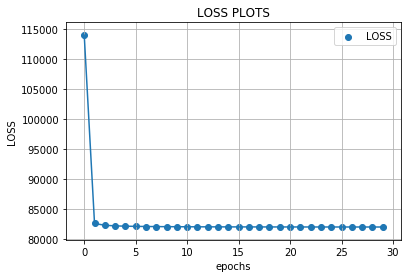

In [96]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(30)], LOSS)
plt.scatter([i for i in range(30)], LOSS, label='LOSS')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("LOSS")
plt.title("LOSS PLOTS")
plt.grid()
plt.show()

Make Final Predictions

In [0]:
predictions = []

for i,j,rating in zip(user, item, ratings):
  
  pred = u + user_bias[i-1] + item_bias[j-1] + np.dot(U[i-1],V[j-1])
  predictions.append(pred)


<h3> Calculate Mean square error </h3> 

In [58]:
from sklearn.metrics import mean_squared_error 
print("Mean Squared Error of ratings is :" ,mean_squared_error(ratings,predictions))

Mean Squared Error of ratings is : 0.9066983896305808


<h1>Task 2 </h2>

In [59]:
from google.colab import files
uploaded = files.upload()

Saving user_info.csv to user_info.csv


In [60]:
data = pd.read_csv("user_info.csv")
data.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [0]:
ismale = list(data['is_male'])

Split data in train and test 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(U, ismale, test_size=0.33)

In [89]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 

In [90]:
grid.best_params_

{'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 3}

In [0]:
clf = xgb.XGBClassifier(gamma= 0.3, max_depth= 3, min_child_weight= 1)

In [91]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions = model.predict(X_cv)

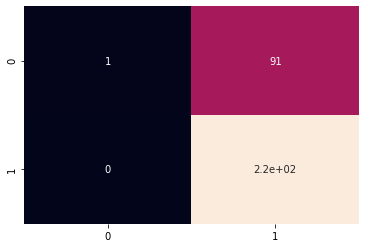

In [93]:
sns.heatmap(confusion_matrix(y_cv, predictions) ,annot=True,cbar=False)